%%html
<style>
    .exercise {
        background-color: #AFEEEE;
        font-style: normal;
        text-align: justify;
        margin-left: 0px;
        margin-right: 10px;
        margin-top: 10px;
        margin-bottom: 0px;
        display: block;
    }
</style>

<center style="font-size:20px;padding-bottom:10px;">Máster en Ciencia de Datos -  Universidad Autónoma de Madrid</center>

<center style="font-size:20px;padding-bottom:10px;">José Antonio Álvarez Ocete</center>

<center style="font-size:20px;">Francisco Javier Sáez Maldonado</center>

# Introducción


En un *enfoque bayesiano* de la estadística, un parámetro $\theta$ se
considera una variable aleatoria con una determinada distribución de
probabilidad. El teorema de Bayes relaciona la información inicial que
se tiene del parámetro $\theta$ antes de realizar un experimento y la
información que se dispone después de realizar el experimento.

-   La información inicial que se tiene sobre $\theta$ se representa
    mediante su *distribución a priori* $\pi(\theta)$

-   La información que se tiene de $\theta$ después de realizar uno
    (o varios) experimento/s, $x$, se codifica mediante su
    *distribución a posteriori* $\pi(\theta | x)$.

-   El teorema de Bayes nos permite obtener la densidad de probabilidad
    $\pi(\theta | x)$ en función del resultado del experimento y la
    densidad de probabilidad a priori $\pi(\theta)$

$$
    \pi(\theta | x) = \frac{ \pi(x | \theta) } { \int_{-\infty}^{\infty} \pi(x | \theta) \pi(\theta) \; d\theta} \; \pi(\theta)
$$

-   La cantidad $\pi(x | \theta)$ del numerador se denomina
    *verosimilitud* (*likelihood*). Es una **función** y representa la
    probabilidad de observar el resultado del experimento $x$
    (muestra) en función del valor del parámetro $\theta$

    $$ \pi(x | \theta) = \prod_i f(x_i | \theta) $$

    siendo $x_i$ con $i=1, \ldots, n$ los resultados del
    experimento (valores muestrales) y $f(x_i | \theta)$ sus
    probabilidades para un determinado valor de $\theta$.

-   El denominador $\int_{-\infty}^{\infty} \pi(x | \theta)
    \pi(\theta) \; d\theta$, una vez realizada la integración,
    **no** depende del parámetro $\theta$. Es una constante de
    normalización.

-   Para realizar previsiones se utilizan *distribuciones predictivas*
    (valor esperado de una determinada función)

$$
    E[ g(y|x) ] = \int g(y| \theta) \; \pi(\theta | x)\; d\theta
$$

Por ejemplo, es habitual usar como *predictor* del valor de la v.a
    $\theta$ su valor esperado: $$ \widehat{\theta} = \int
    \theta \; \pi(\theta | x) \; d\theta $$

-   Cuando las distribuciones a priori y a posteriori son del mismo tipo
    se dice que son "conjugadas a priori". A menudo esto implica grandes
    beneficios desde el punto de vista computacional.


-   La descripción formal de la inferencia bayesiana es sencilla, sin
    embargo su implementación **habitualmente no es fácil** y requiere
    Métodos de Monte Carlo.


<div class="exercise">
<h1>Ejercicio 1</h1> <a href='#Ejercicio-1' class='anchor-link'>¶</a>

Estimar la probabilidad de que un paciente ingresado
en planta acabe en la UCI. Para realizar este problema mediante
inferencia Bayesiana debemos tener en cuenta: 
* La probabilidad de que un paciente ingresado en planta acabe en la UCI será nuestro parámetro
$\theta$. Como hemos visto, en el enfoque bayesiano debemos
considerar que $\theta$ es una variable aleatoria. 
* Debemos conocer
la distribución de la v.a $\theta$ **antes** de realizar el
experimento, es decir su *densidad de probabilidad a priori*
$\pi(\theta)$. Supongamos, por ejemplo, que $\pi(\theta) =
B(\theta | \alpha = 5, \beta = 10)$. 
* Debemos incorporar el
resultado del experimento. Considerad el siguiente experimento: se
contabiliza cuantos de los pacientes que hay en planta ($n$) deben
ingresar en la UCI ($k$). Se observa que de los $n=20$ pacientes en
planta $k=1$ ingresan en la UCI. 
* Debemos calcular la función de
verosimilitud $\pi(x | \theta)$ del resultado del experimento. La
función de verosimilitud será proporcional a la probabilidad de observar
el resultado del experimento en función del valor de $\theta$): $$
\pi(x | \theta) \propto \theta^k (1-\theta)^{n-k} $$ donde, en
este caso, habría que substituir $n=20$ y $k=1$. Notad como en la
ecuación anterior $\pi(x|\theta)$ **no** está normalizada. 
* Debemos elegir un *predictor* adecuado a nuestro problema. Como
predictor de $\theta$ *la probabilidad de que un paciente de la
planta acabe en la UCI* utilizaremos su valor esperado
$E[\theta]$. Nos preguntarnos entonces:

    1. ¿Cuál es el valor de $E[\theta]$ **antes** de realizar el experimento? 
    2. ¿Cuál es el valor de $E[\theta]$ **después** de observar el resultado del experimento?

   
* **Ayuda** La pregunta (1) es fácil. Al ser la distribución a priori $\pi(\theta)$ la distribución $Beta$, su valor esperado será
    $$ \mu_{\text{prior}} = E[\theta]_{\text{prior}} = \int_{-\infty}^{\infty} \theta \; B(\theta | \alpha, \beta) \; d\theta = \frac{\alpha}{\alpha + \beta} $$
    
* Para la pregunta (2) se debe calcular: $$ \mu_{\text{posterior}}= E[\theta]_{\text{posterior}} = \int_{-\infty}^{\infty} \theta \; \pi(\theta | x) \; d\theta $$
Para ello se necesita conocer la distribución a posteriori $\pi(\theta | x)$. Utilizando el teorema de Bayes, tras re-ordenar términos se obtiene: 

<!---
\begin{align*} 
    E[\theta]_{\text{posterior}} &=
    \int_{-\infty}^{\infty} \theta \; \pi(\theta | x) \; d \theta 
    \ &= \int_{-\infty}^{\infty} \theta \; \frac{ \pi(x |
    \theta) \; \pi(\theta) } { \int_{-\infty}^{\infty} \pi(x |
    \theta) \pi(\theta) \; d \theta} \; d \theta = \frac{
    \int_{-\infty}^{\infty} \theta \; \pi(x | \theta) \;
    \pi(\theta) \; d \theta } { \int_{-\infty}^{\infty} \pi(x |
    \theta) \; \pi(\theta) \; d \theta} 
    \ &= \frac{\int_{-\infty}^{\infty} \theta \; \theta^k
    (1-\theta)^{n-k} \; \; \pi(\theta) \; d \theta } {
    \int_{-\infty}^{\infty} \pi(x | \theta) \; \pi(\theta) \;
    
    d \theta} = \frac{ \int_{0}^{1} \; \theta^{k+1} (1-\theta)^{n-k}
    \; \; B(\theta | \alpha=5, \beta=10) \; d \theta } {
    \int_{0}^{1} \theta^{k} (1-\theta)^{n-k} \; B(\theta | \alpha=5,
    \beta=10) \; d \theta}
\end{align*} 

donde se han sustituído los
valores de $\pi(\theta)$ y de la verosimilitud $\pi(x | \theta)$
. Sino supiésemos resolver analíticamente las integrales anteriores (en
este caso sí hay solución analítica aunque no es fácil) podemos
**estimar** el numerador y el denominador mediante integración de
Monte Carlo.  --->
</div>

### Solución

Para este ejercicio estimaremos la probabilidad de que un paciente ingresado en planta sea trasladado a UCI, que denominaremos por $\theta$. Para ello lo tratamos como una variable aleatoria como hace el enfoque Bayesiano. Consideramos:

- La distribución a priori será una beta de parámetros $\alpha=5, \beta=10$:

$$\pi(\theta) = B(\theta | \alpha = 5, \beta = 10)$$

- El experimento realizado revela que de los $n=20$ pacientes estudiados, unicamente $k=1$ ha sido trasladado a la UCI. La función de verosimilitud será la probabilidad de observar el resultado del experimento dado $\theta$. Esta variable aleatoria sigue una distribución binomial con parámetros $n=20$ y $p=\theta$:

$$\pi(x|\theta) = P_k = \binom{n}{k} \theta^k (1 - \theta)^{n-k} $$

En el caso de nuestro experimento:

$$\pi(x|\theta) = P_1 = \binom{20}{1} \theta^1 (1 - \theta)^{20-1} = 20 \cdot \theta (1 - \theta)^{19}$$ 

Daremos dos predicciones del valor de $\theta$:

1. ¿Cuál es el valor de $E[\theta]$ **antes** de realizar el experimento?
2. ¿Cuál es el valor de $E[\theta]$ **después** de observar el resultado del experimento?

### Respuestas

- La pregunta (1) es sencilla: puesto que $\theta$ sigue una distribución beta con parámetros conocidos, basta con calcular la esperanza de dicha distribución:

\begin{equation}
    \mu_{\text{prior}} = E[\theta]_{\text{prior}} = \int_{-\infty}^{\infty} \theta  \; B(\theta | \alpha, \beta) \;  d\theta =  \frac{\alpha}{\alpha + \beta}
\end{equation}

TODO: podemos demostrar que la esperanza de la beta es esa si tenemos tiempo

- Para la pregunta (2) hemos de tener en cuenta los resultados del experimento desde el punto de vista Bayesiano. Utilizando el teorema de Bayes comentado en la introducción obtenemos:

\begin{align}
    E[\theta]_{\text{posterior}} &= 
    \int_{-\infty}^{\infty} \theta \;  \pi(\theta | x)  \; d\theta \\
                    &= \int_{-\infty}^{\infty} \theta \;     
    \frac{ \pi(x | \theta) \; \pi(\theta) }
    { \int_{-\infty}^{\infty}  \pi(x | \theta) \pi(\theta) \; d\theta} 
    \;  d\theta  = 
    \frac{ \int_{-\infty}^{\infty} \theta  \; \pi(x | \theta) \; \pi(\theta) \;  d\theta }
        { \int_{-\infty}^{\infty}            \pi(x | \theta) \; \pi(\theta) \; d\theta} \\
    &= \frac{\int_{-\infty}^{\infty} \theta  \; \theta^k (1-\theta)^{n-k}  \; \; \pi(\theta) \; d\theta }
    { \int_{-\infty}^{\infty}  \pi(x | \theta) \; \pi(\theta) \; d\theta}  =
    \frac{ \int_{0}^{1}  \; \theta^{k+1} (1-\theta)^{n-k}  \; \; B(\theta| \alpha=5, \beta=10) \; d\theta }
    { \int_{0}^{1}   \theta^{k} (1-\theta)^{n-k} \; B(\theta| \alpha=5, \beta=10) \; d\theta} 
\end{align}

Para obtener este valor podemos o bien resolver analíticamente estas integrales, o bien estimarlas utilizando métodos de MonteCarlo. Puede probarse (TODO) que en este caso la expresión de $\pi(\theta | x)$ es cerrada (esto es, las distribuciones son conjugadas a priori). $\pi(\theta | x)$ viene dada por una distribución beta de parámetros $B(\alpha + k, \beta + n - k)$. Por lo tanto, la respuesta a la segunda pregunta es la esperanza de esta distribución beta:

\begin{equation}
    \mu_{\text{posterior}} = E[\theta]_{\text{posterior}} = \int_{-\infty}^{\infty} \theta  \; B(\theta | \alpha + k, \beta + n - k) \;  d\theta =  \frac{\alpha + k}{\alpha + k + \beta + n - k} = \frac{\alpha + k}{\alpha + \beta + n}
\end{equation}

### Implementación

Procedemos a pintar las distribuciones de probabilidad para $\theta$ a priori, posteriori, y la verosimilitud. Como la verosimilitud no es una distribución de probabilidad, vamos a normalizarla (multiplicar por una constante para que integre uno en $(0,1)$). Para ello, calculamos su integral en $(0,1)$:

$$
    \int_0^1 \pi(x | \theta) d\theta =  \int_0^1 \binom{n}{k} \theta^k (1 - \theta)^{n-k} d\theta =  \binom{n}{k} \int_0^1 \theta^k (1 - \theta)^{n-k} d\theta
$$

Esto es una integral polinómica. Utilizámos un software de cálculo numérico como [WolframAlpha](https://www.wolframalpha.com/input/?i=integrate+%5Cbinom%7Bn%7D%7Bk%7D++x%5Ek+%281+-+x%29%5E%7Bn-k%7D+from+0+to+1) para resolverla:

$$
    \binom{n}{k} \int_0^1 \theta^k (1 - \theta)^{n-k} d\theta = \frac{\binom{n}{k} \Gamma(1 + k) \Gamma(1 - k + n))}{\Gamma(2 + n)}
$$

Donde utilizamos que $\Gamma(m) = \; !(m-1)$ si $m$ es entero, y la descomposición en factoriales del binomio:

$$
    \frac{\binom{n}{k} \Gamma(1 + k) \Gamma(1 - k + n))}{\Gamma(2 + n)} = \frac{n!}{k! \; (n-k)!} \frac{k! \; (n-k)!}{(n+1)!} = \frac{n!}{(n+1)!} = \frac{1}{n+1}
$$

Por lo tanto, para convertir a la máxima verosimilutd $\pi(x | \theta)$ en una distribución de probabilidad de $\theta$ basta con multiplicarla por $(n+1)$.

Expected probability a priori: 0.3333
Expected probability a posterior: 0.1714
Experimento:
 Total pacientes: 20  UCI: 1


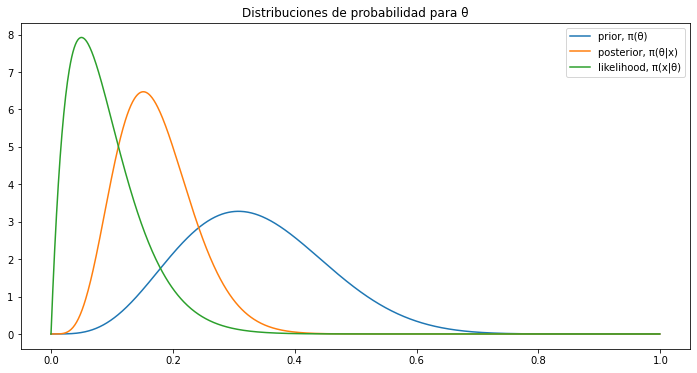

In [20]:
from scipy.stats import beta
from scipy.special import binom
import matplotlib.pyplot as plt
import numpy as np

def plot_beta(a, b):
    x = np.arange(0, 1, 0.001)
    y = beta.pdf(x, a, b)
    plt.plot(x, y)

def plot_likelihood(n, k):
    x = np.arange(0, 1, 0.001)
    b = binom(n, k)
    y = (n+1) * b * x**k * (1-x)**(n-k)
    plt.plot(x, y)

def compute_beta_mean(a,b):
    return a / (a + b)

def plot_bayesian_viewpoint(n=20, k=1, a=5, b=10):
    # Print numerical values
    E_prior = compute_beta_mean(a,b)
    E_posterior = compute_beta_mean(a + k, b + n - k)
    print('Expected probability a priori: {:0.4f}'.format(E_prior))
    print('Expected probability a posterior: {:0.4f}'.format(E_posterior))
    print('Experimento:\n Total pacientes: {}  UCI: {}'.format(n, k))

    # Plotting
    plt.figure(figsize=(12,6))

    plot_beta(a, b)
    plot_beta(a + k, b + n - k)
    plot_likelihood(n, k)

    plt.legend(['prior, π(θ)', 'posterior, π(θ|x)', 'likelihood, π(x|θ)'])
    plt.title('Distribuciones de probabilidad para θ')
    plt.show()

plot_bayesian_viewpoint()

En esta grafica mostramos las distintas distribuciones de probabilidad teóricas comentadas. Podemos apreciar como la distribución a posterior queda intermedia entre la máxima verosimilitud (la predicción de máxima verosimilitud dado el experimento) y la distribución a priori.

<div class="exercise">
    <h2>Ejercicio 1.1</h2>

¿Qué ocurre cuando aumenta el tamaño del experimento?
</div>

Repetimos el experimento anterior manteniendo los valores de $alpha$ y $beta$, y aumentamos $n$ y $k$ manteniendo el ratio de $1/20$ pacientes pasados a UCI: $(n=100, k=5)$:

Expected probability a priori: 0.3333
Expected probability a posterior: 0.0870
Experimento:
 Total pacientes: 100  UCI: 5


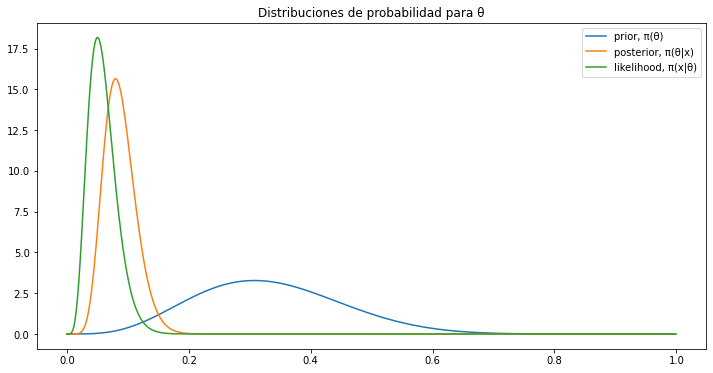

In [21]:
plot_bayesian_viewpoint(n=100, k=5, a=5, b=10)

Vemos como la distribución a posterior se tiende a la máxima verosimilitud normalizada. Este coincide con la intuición, pues a más datos recogidos, más información nos aportan estos sobre el comportamiento real de nuestra variable. Analíticamente sabemos que nuestro estimador a posteriori viene dado por la siguiente expresión:

\begin{equation}
    \mu_{\text{posterior}} = E[\theta]_{\text{posterior}} = \frac{\alpha + k}{\alpha + \beta + n}
\end{equation}

Al hacer el experimento arbitrariamente grande manteniendo el ratio $k/n$ el valor del estimador converge a precisamente a este ratio. Es decir, al aumentar el tamaño del experimento, despreciamos la distribución a priori y la información que está nos aporta y covergemos al valor de máxima verosimilitud $k/n$.

<div class="exercise">
    <h2>Ejercicio 1.3</h2>

Realiza una simulaci'on utilizando Monte Carlo para estimar el valor de $theta$.
</div>

<div class="exercise">
    <h2>Ejercicio 1.4</h2>

Responda a las siguientes cuestiones:
- Por que se debe utilizar la misma muestra de  θ  en el numerador y denominador para estimar  μposterior ?
- ¿Por que a la hora de hacer la simulación de M.C hemos podido utilizar una función sin normalizar proporcional a  π(x|θ)  eq. (5) y no  π(x|θ) ?
</div>

<div class="exercise">
    <h2>Ejercicio 1.4</h2>

Supón que no se dispone de un generador de números aleatorios para la distribución a priori (porqué o bien no dispones de un algoritmo o este es muy ineficaz) ¿Podrías estimar  μposterior ? Estima el valor de  μposterior  sin utilizar el generador de una muestra de Beta (por ejemplo utiliza una distribución  U(0,1) ). Discute el intervalo de confianza de la estimación.
</div>

